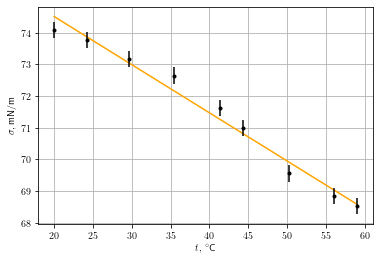

slope: -0.15200475071143232 +/- 0.008490442149581705
intercept: 77.54562123681431 +/- 0.3573792631521728


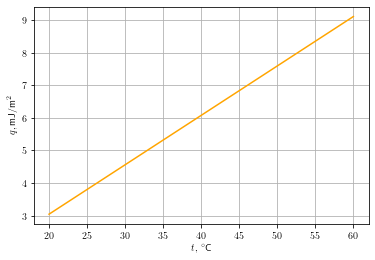

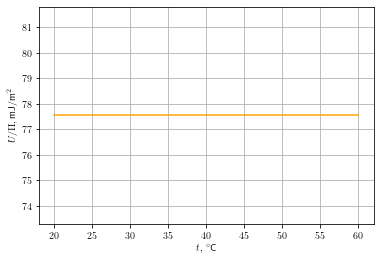

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from scipy.stats import linregress
plt = reload(plt)

plt.rcParams['text.usetex'] = True
plt.grid()
plt.xlabel(r'$t,\, ^\circ$C')
plt.ylabel(r'$\sigma,\,$mN/m')

pressure = [203.8, 203.2, 202.0, 201.0, 199.0, 197.8, 195.0, 193.6, 193.0]
pressure_err = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

t = [20.0, 24.2, 29.6, 35.5, 41.4, 44.3, 50.3, 56.0, 59.0]
sigma = []

for it in pressure:
    sigma.append((it * 0.2 * 9.80665 - 998.2 * 9.81 * 0.0120) * 1.05 / 4)

x_err = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
y_err = []

for it in pressure_err:
    y_err.append((it * 0.2 * 9.80665) * 1.05 / 4)

coef = np.polyfit(t, sigma, 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients

plt.plot(t, poly1d_fn(t), color ='orange')
plt.errorbar(t, sigma, xerr = x_err, yerr = y_err, fmt ='.', color ='black')
plt.savefig('PIC_2.png', dpi = 1200)
plt.show()

p, V = np.polyfit(t, sigma, 1, cov=True)
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

plt.xlabel(r'$t,\, ^\circ$C')
plt.ylabel(r'$q,\,$mJ/m$^2$')
plt.grid()

poly1d_q = np.poly1d([-p[0], 0])
plt.plot([20, 60], poly1d_q([20,60]), color = 'orange')
plt.savefig('PIC_3.png', dpi = 1200)
plt.show()

plt.xlabel(r'$t,\, ^\circ$C')
plt.ylabel(r'$U/\Pi,\,$mJ/m$^2$')
plt.grid()

poly1d_q = np.poly1d([-p[0], 0])

x_new = [20, 60]
y_new = [p[1], p[1]]

plt.plot(x_new, y_new, color = 'orange')
plt.savefig('PIC_4.png', dpi = 1200)
plt.show()